In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from collections import Counter

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


In [44]:
t2011 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2011.csv")
t2012 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2012.csv")
t2013 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2013.csv")
t2014 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2014.csv")
t2015 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2015.csv")
t2016 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2016.csv")


In [15]:
t2011.describe().T


,count,mean,std,min,25%,50%,75%,max
Area Id,179112.0,1.740648,0.746468,1.0,1.0,2.0,2.0,3.0
Priority,180015.0,1.796111,0.402916,0.0,2.0,2.0,2.0,2.0


In [16]:
t2012.describe().T


,count,mean,std,min,25%,50%,75%,max
Area Id,186016.0,1.456751,0.498127,1.0,1.0,1.0,2.0,2.0
Priority,187430.0,1.776311,0.416717,1.0,2.0,2.0,2.0,2.0
Zip Codes,175.0,13430.194286,9517.723061,170.0,4547.0,13025.0,20663.5,33120.0


In [17]:
t2013.describe().T


,count,mean,std,min,25%,50%,75%,max
Area Id,185794.0,1.433695,0.495586,1.0,1.0,1.0,2.0,2.0
Priority,188051.0,1.770206,0.420967,0.0,2.0,2.0,2.0,2.0


In [18]:
t2014.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Id,9693.0,1.650160,0.901499,1.0,1.0,1.0,2.0,5.0
Priority,187480.0,1.771853,0.419639,1.0,2.0,2.0,2.0,2.0
Zip Codes,177.0,14661.564972,9784.037230,55.0,5034.0,14349.0,23486.0,32748.0


In [19]:
t2015.describe().T


,count,mean,std,min,25%,50%,75%,max
Priority,192581.0,1.779729,0.414443,0.0,2.0,2.0,2.0,2.0


In [20]:

t2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Priority,110827.0,1.778438,0.415299,1.0,2.0,2.0,2.0,2.0


In [22]:
#标称值频数
table_cat = ff.create_table(t2011.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

In [23]:
table_cat = ff.create_table(t2012.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

In [24]:
table_cat = ff.create_table(t2013.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

In [25]:
table_cat = ff.create_table(t2014.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

In [26]:
table_cat = ff.create_table(t2015.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

In [31]:
table_cat = ff.create_table(t2016.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

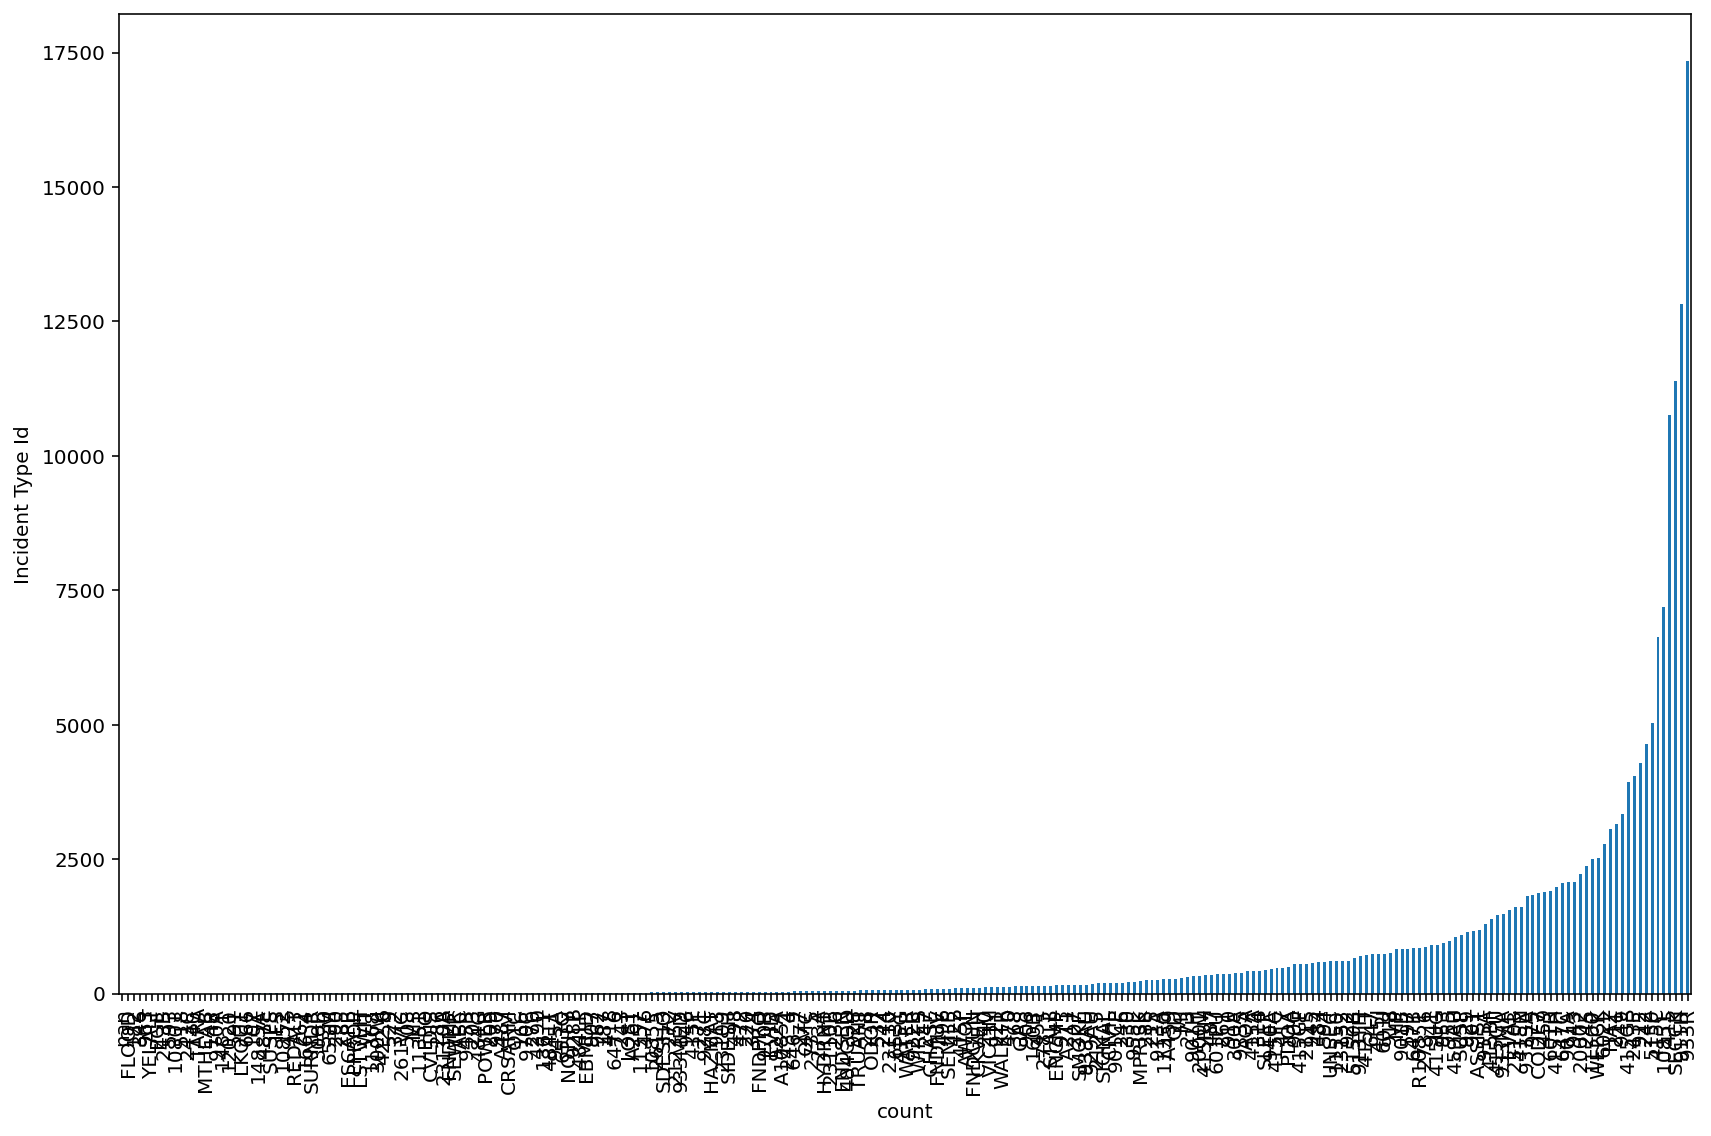

In [32]:
#事件发生类型可能聚会频数
MIDSIZE = (12, 8)
fig, ax = plt.subplots(figsize=MIDSIZE)
t2011['IncidentTypeId'].value_counts(dropna=False, ascending=True).plot(kind='bar', ax=ax)
ax.set_ylabel("IncidentTypeId")
ax.set_xlabel("count")
fig.tight_layout()

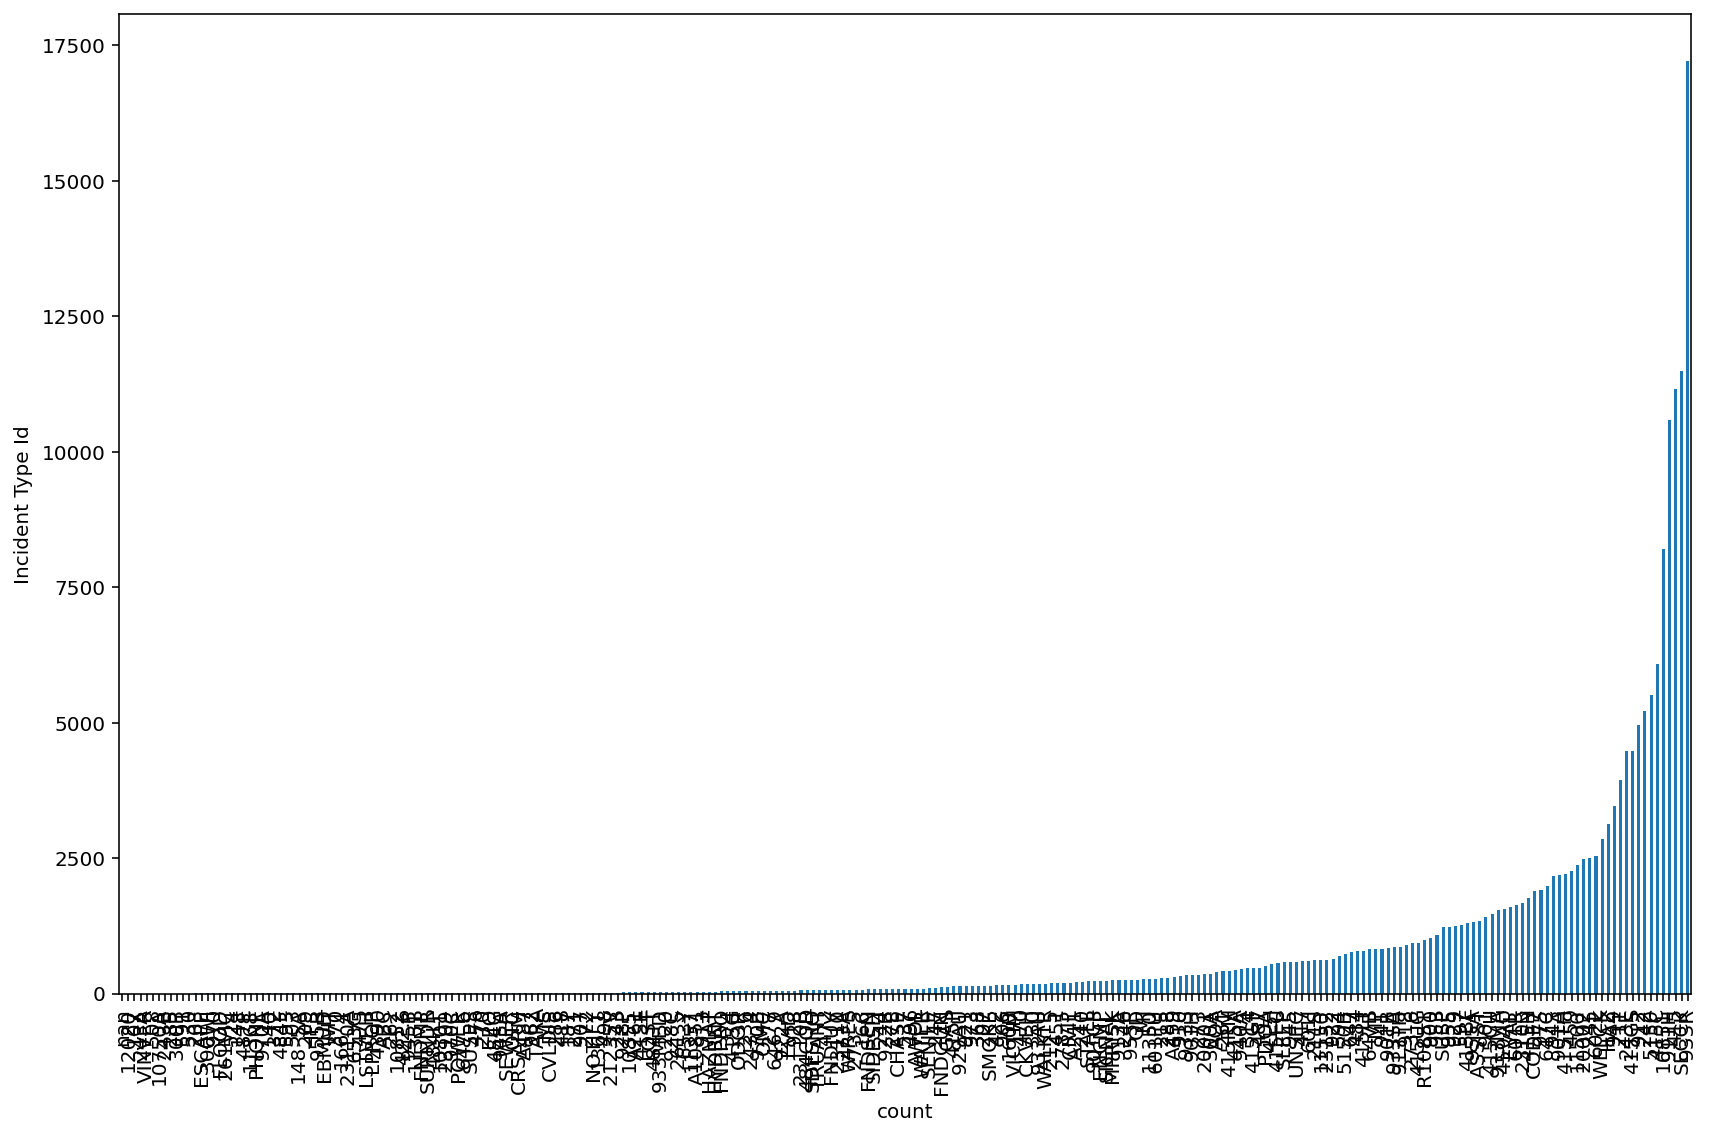

In [33]:

MIDSIZE = (12, 8)
fig, ax = plt.subplots(figsize=MIDSIZE)
t2012['IncidentTypeId'].value_counts(dropna=False, ascending=True).plot(kind='bar', ax=ax)
ax.set_ylabel("IncidentTypeId")
ax.set_xlabel("count")
fig.tight_layout()

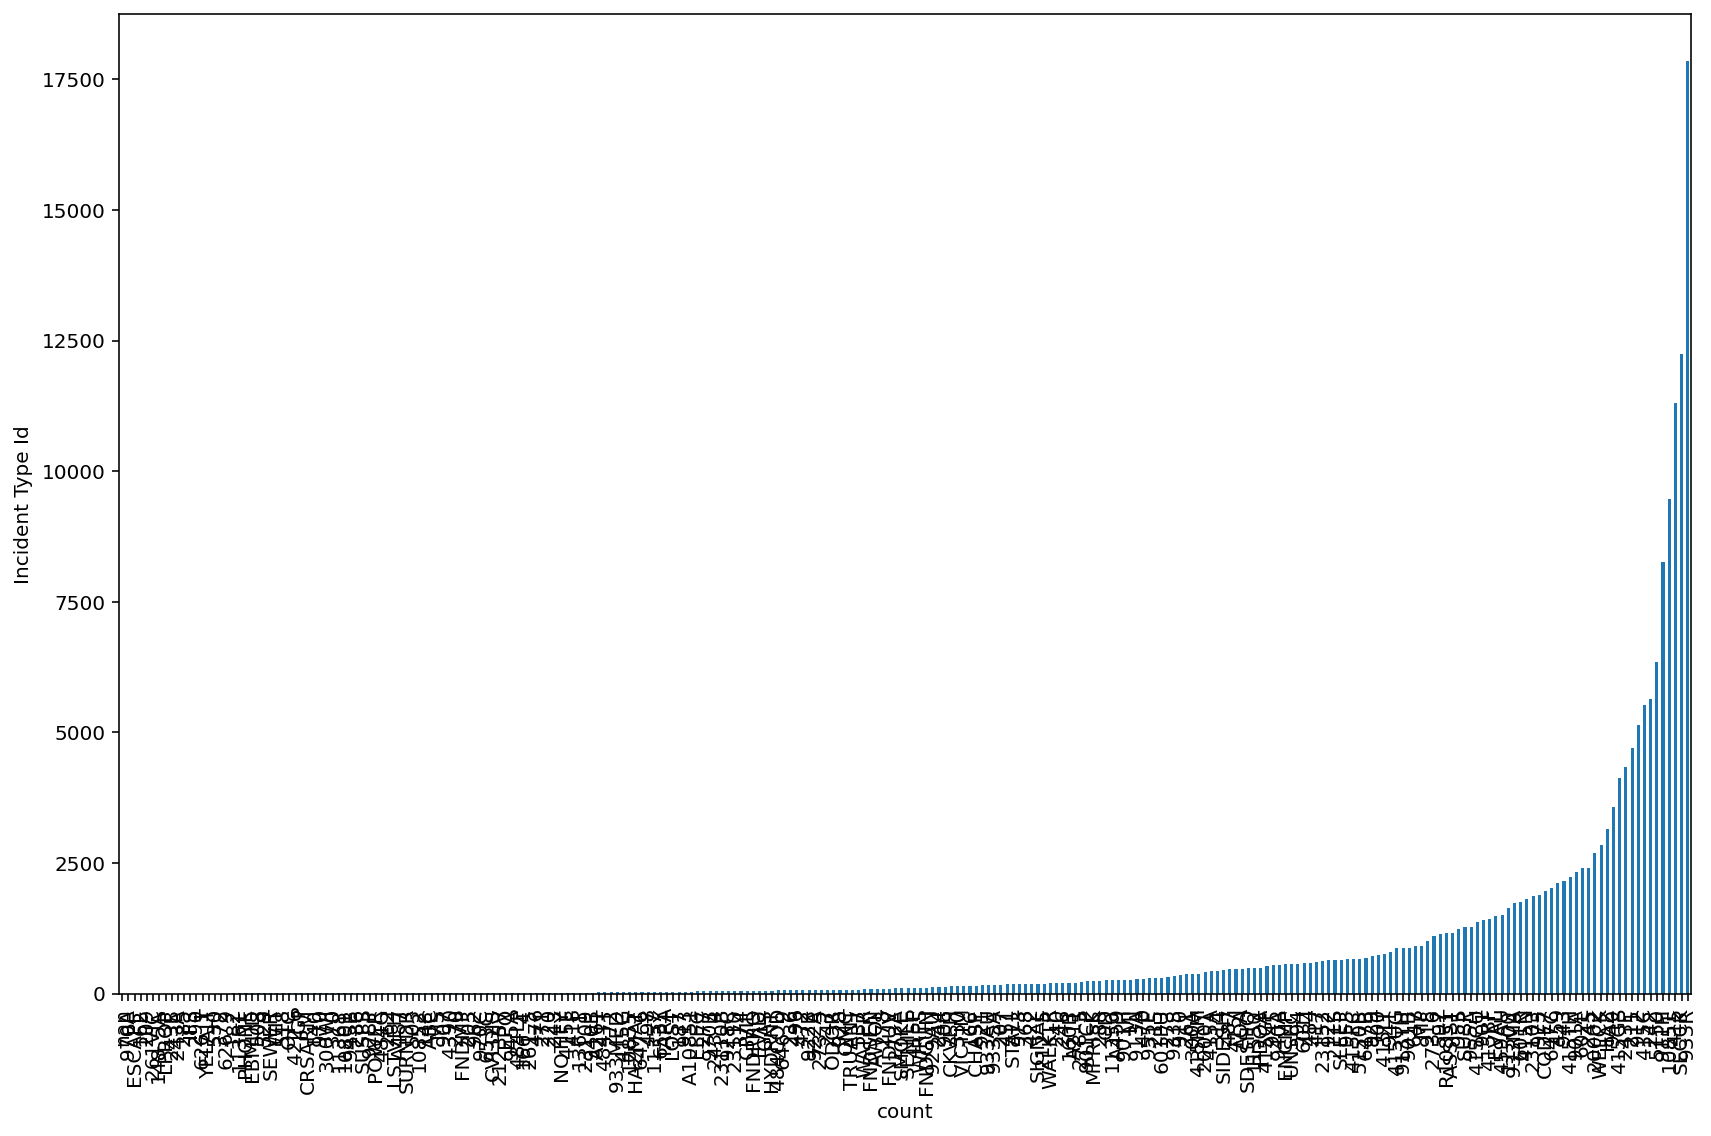

In [34]:

MIDSIZE = (12, 8)
fig, ax = plt.subplots(figsize=MIDSIZE)
t2013['IncidentTypeId'].value_counts(dropna=False, ascending=True).plot(kind='bar', ax=ax)
ax.set_ylabel("IncidentTypeId")
ax.set_xlabel("count")
fig.tight_layout()

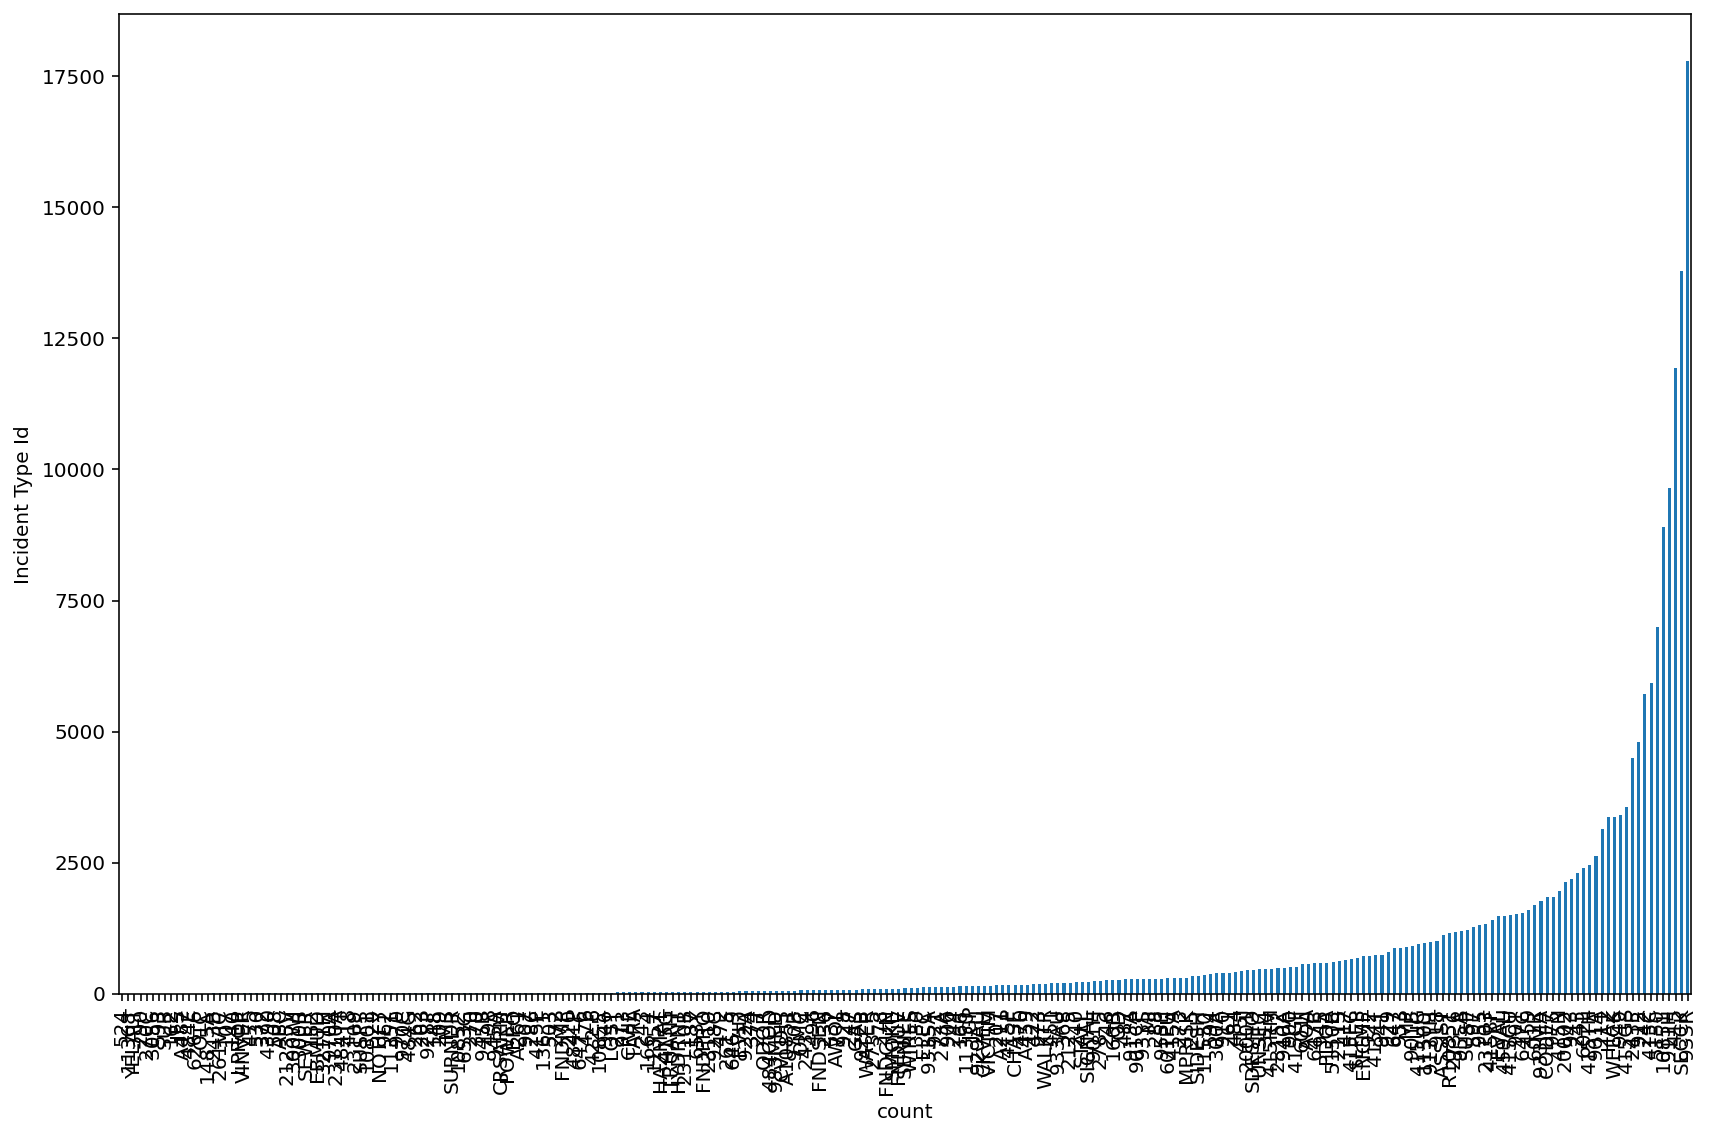

In [35]:

MIDSIZE = (12, 8)
fig, ax = plt.subplots(figsize=MIDSIZE)
t2014['IncidentTypeId'].value_counts(dropna=False, ascending=True).plot(kind='bar', ax=ax)
ax.set_ylabel("IncidentTypeId")
ax.set_xlabel("count")
fig.tight_layout()

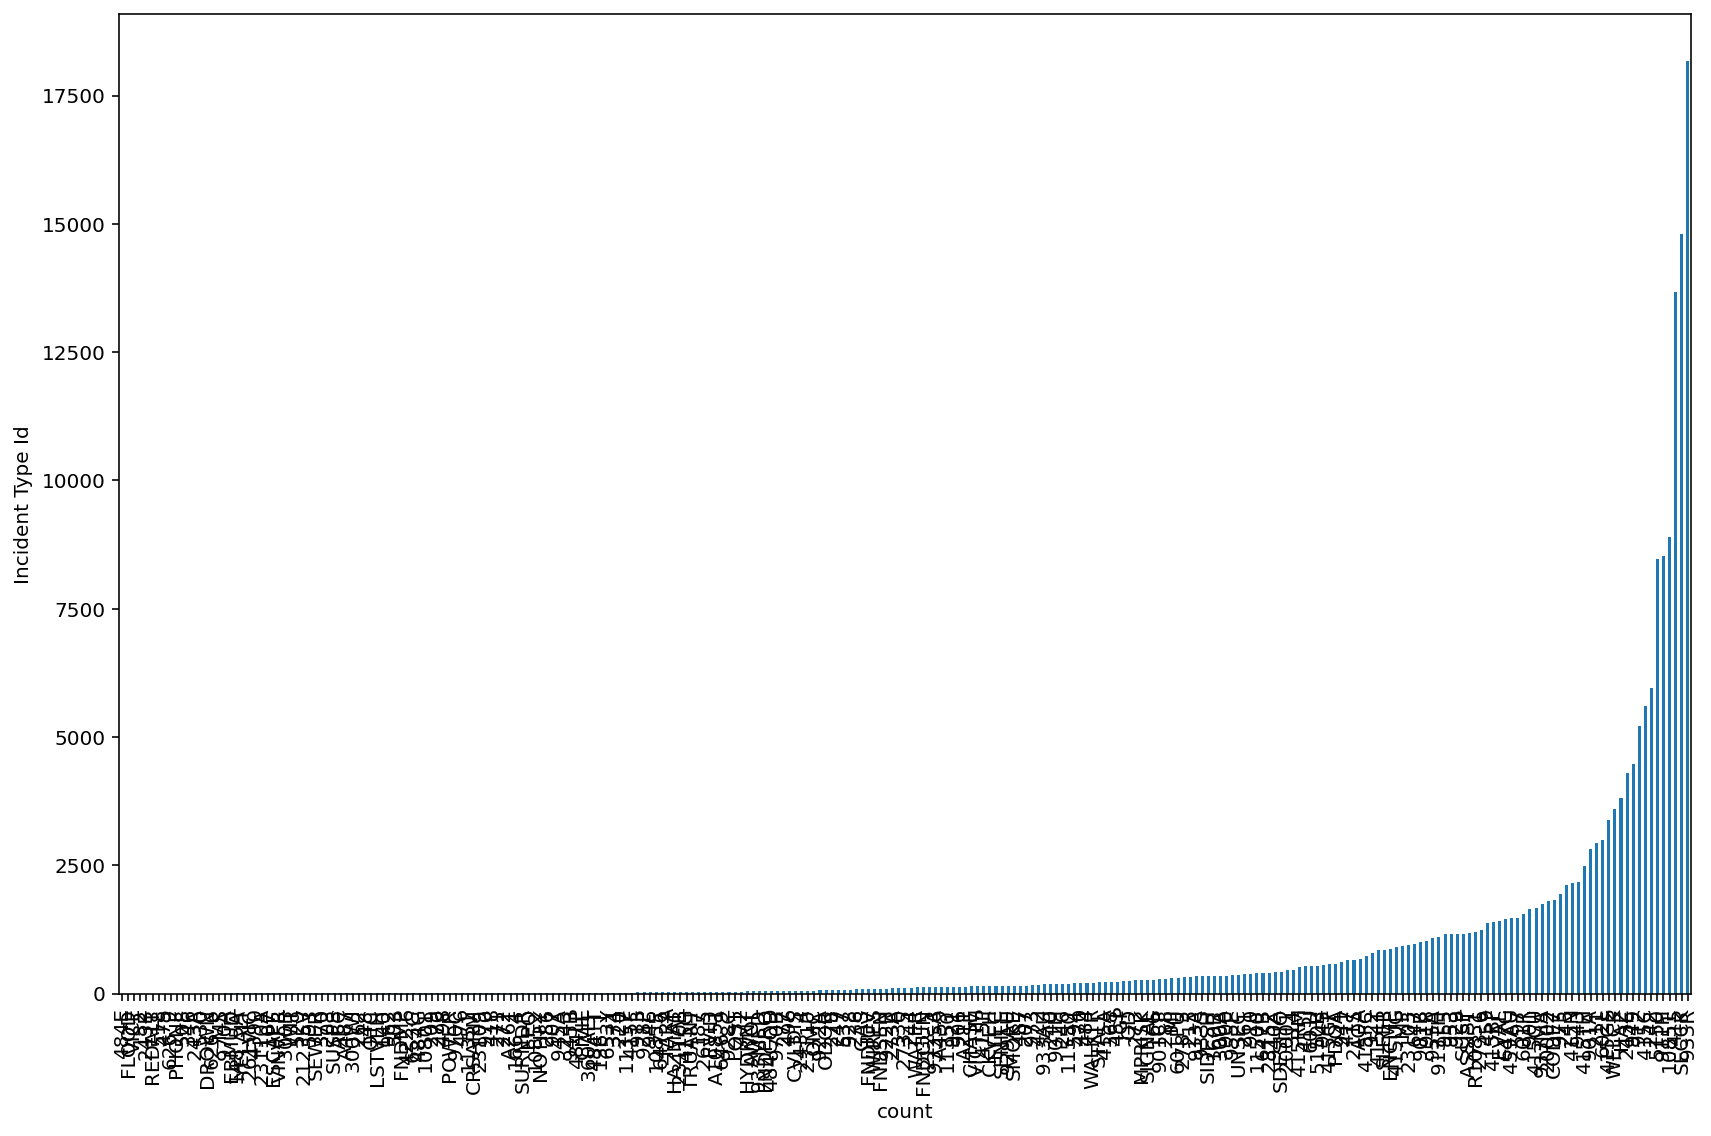

In [37]:

MIDSIZE = (12, 8)
fig, ax = plt.subplots(figsize=MIDSIZE)
t2015['IncidentTypeId'].value_counts(dropna=False, ascending=True).plot(kind='bar', ax=ax)
ax.set_ylabel("Incident Type Id")
ax.set_xlabel("count")
fig.tight_layout()

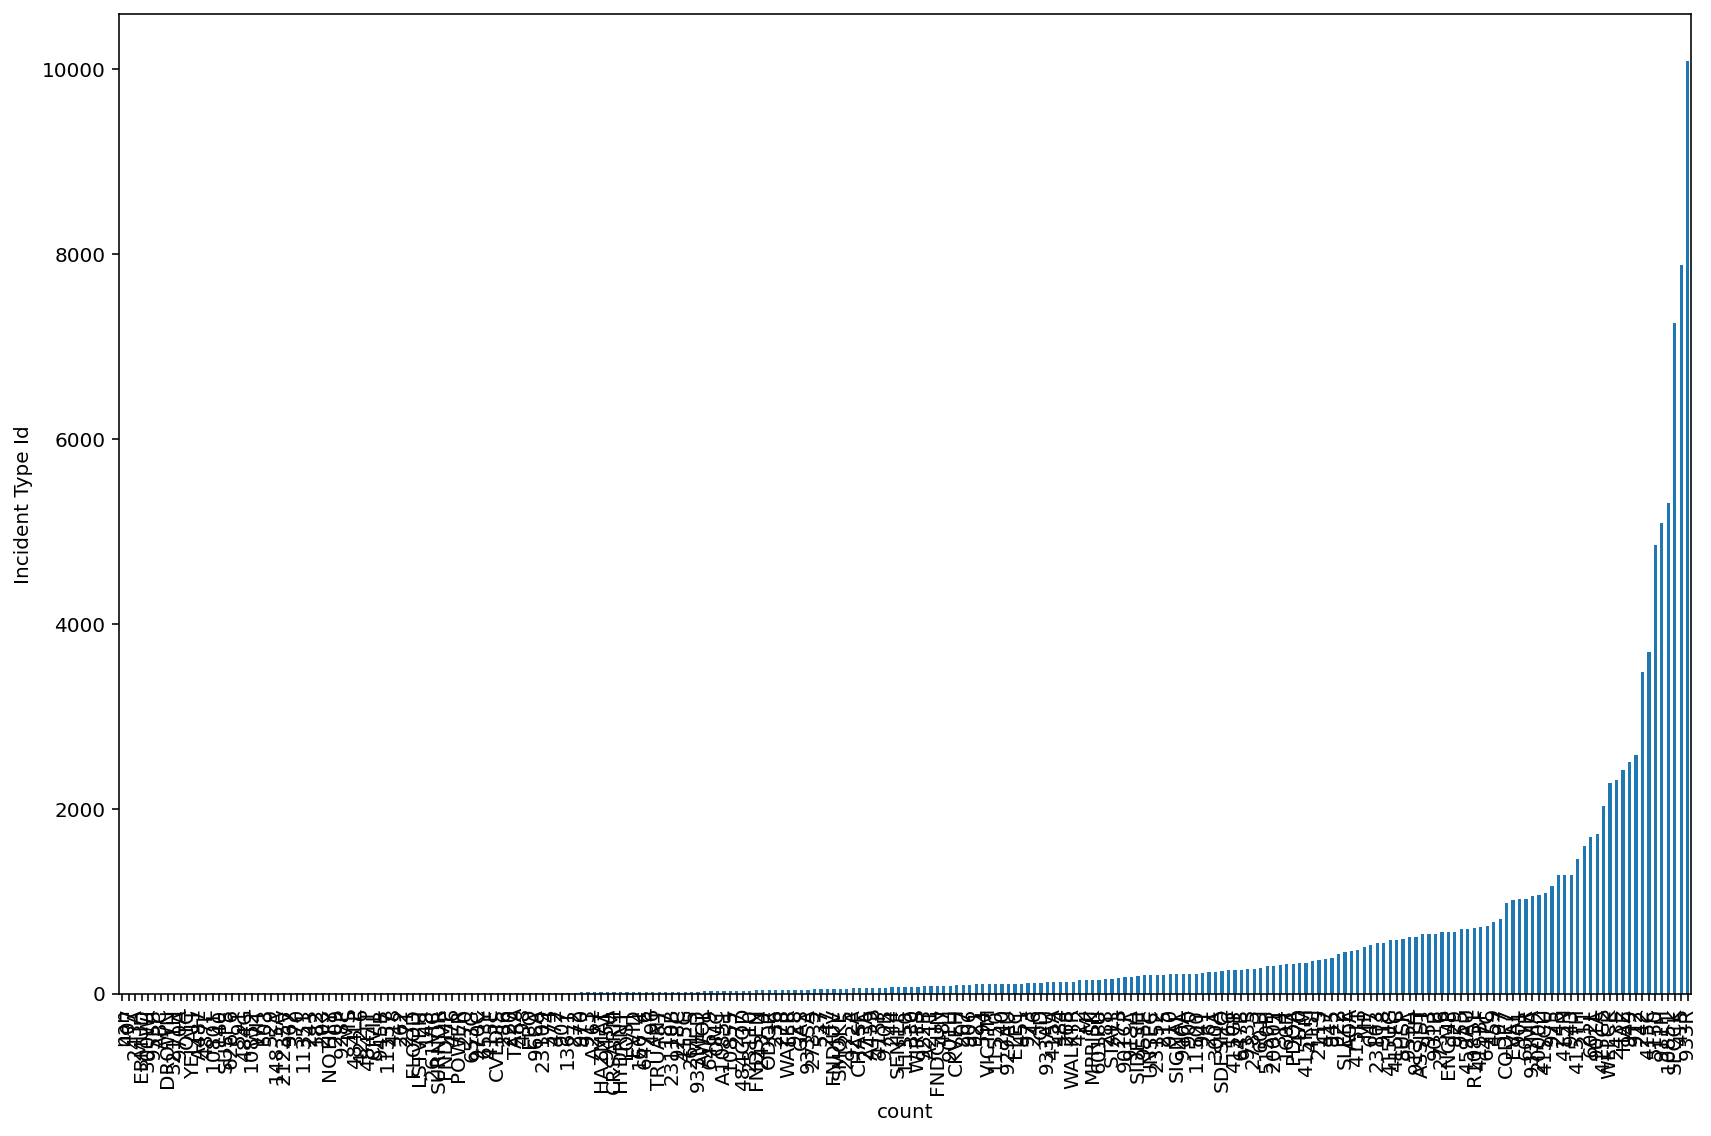

In [36]:

MIDSIZE = (12, 8)
fig, ax = plt.subplots(figsize=MIDSIZE)
t2016['IncidentTypeId'].value_counts(dropna=False, ascending=True).plot(kind='bar', ax=ax)
ax.set_ylabel("Incident Type Id")
ax.set_xlabel("count")
fig.tight_layout()

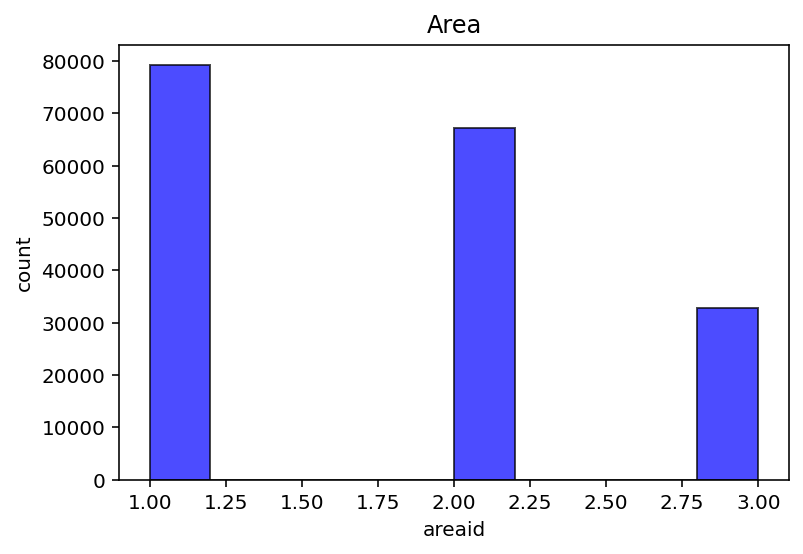

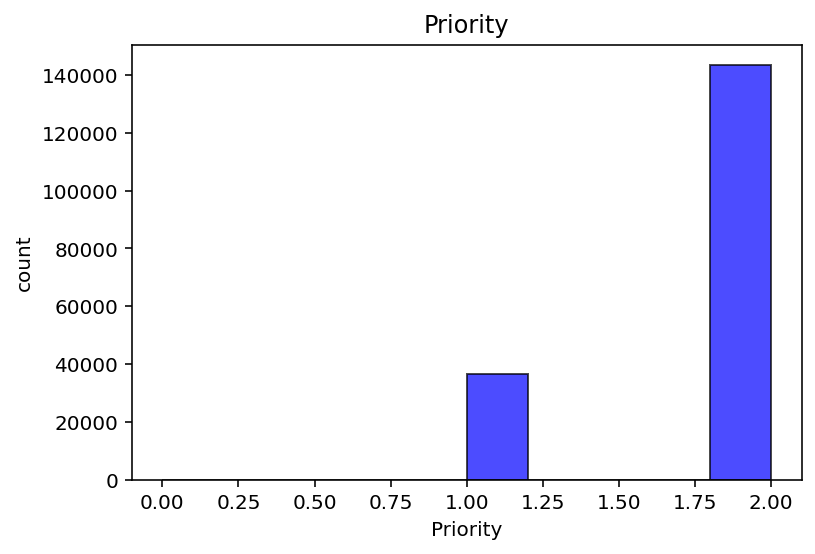

In [55]:
#区域id直方图
plt.hist(t2011.AreaId, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("areaid")
plt.ylabel("count")
plt.title("Area")
plt.show()
#事件优先级直方图
plt.hist(t2011.Priority, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Priority")
plt.ylabel("count")
plt.title("Priority")
plt.show()

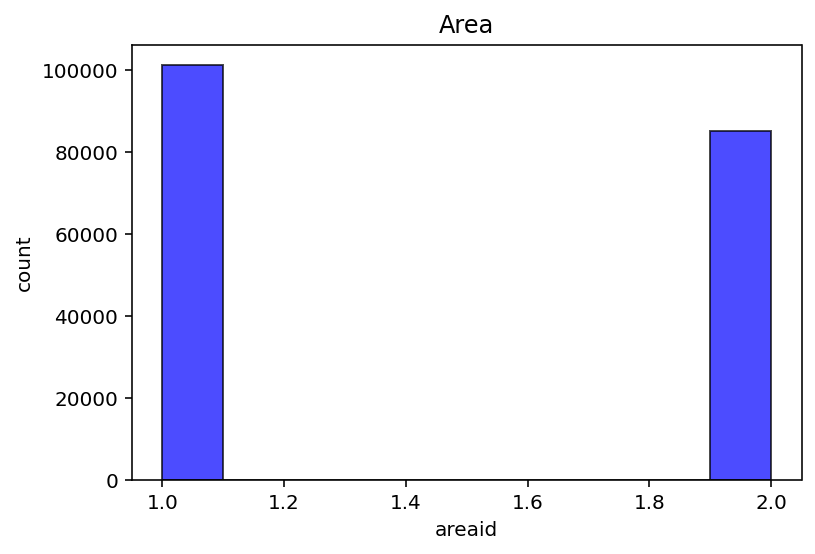

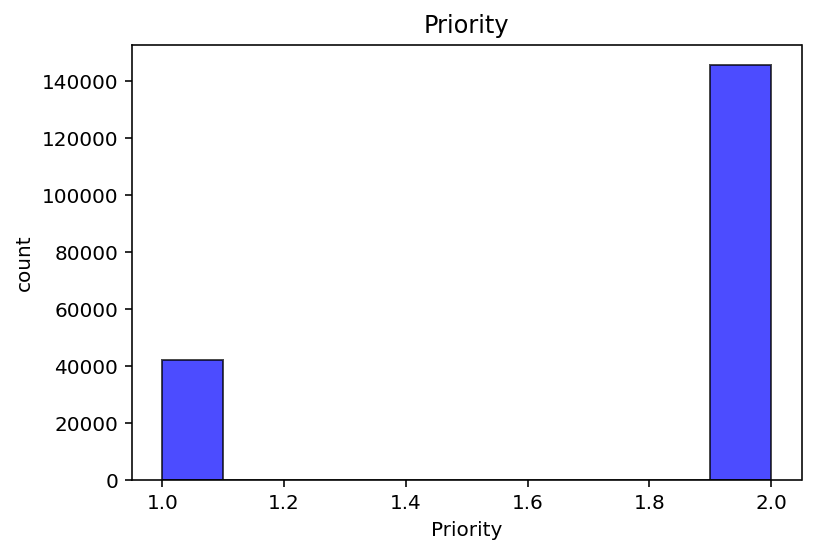

In [56]:
plt.hist(t2012.AreaId, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("areaid")
plt.ylabel("count")
plt.title("Area")
plt.show()

plt.hist(t2012.Priority, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Priority")
plt.ylabel("count")
plt.title("Priority")
plt.show()

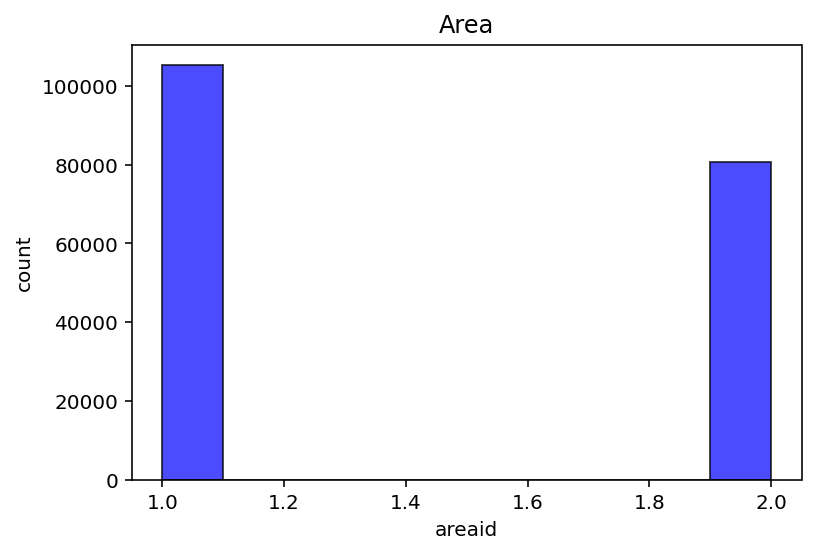

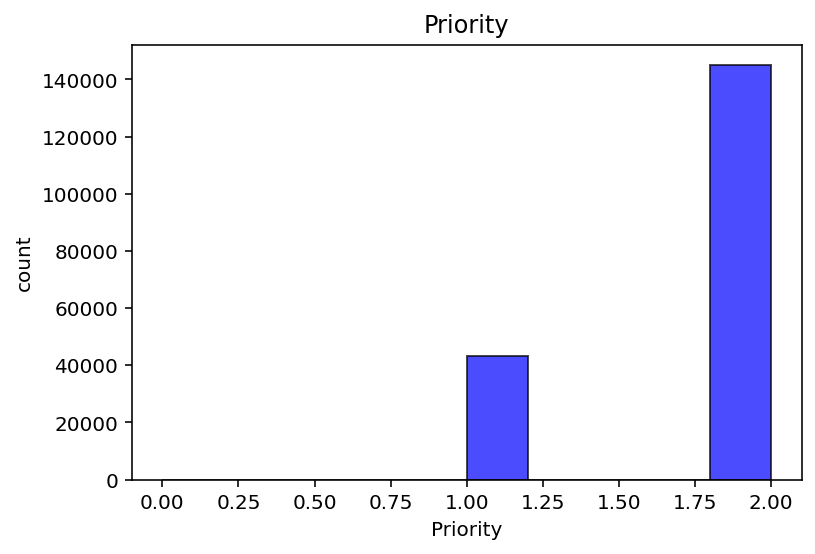

In [58]:
plt.hist(t2013.AreaId, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("areaid")
plt.ylabel("count")
plt.title("Area")
plt.show()

plt.hist(t2013.Priority, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Priority")
plt.ylabel("count")
plt.title("Priority")
plt.show()

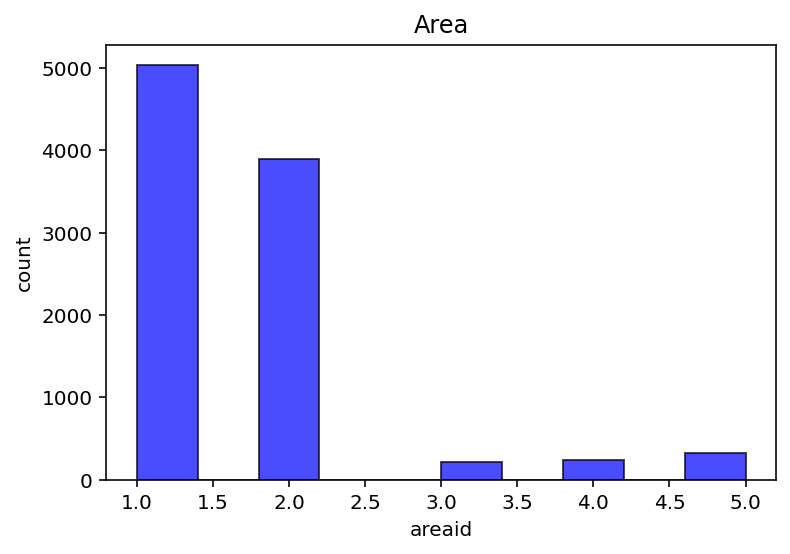

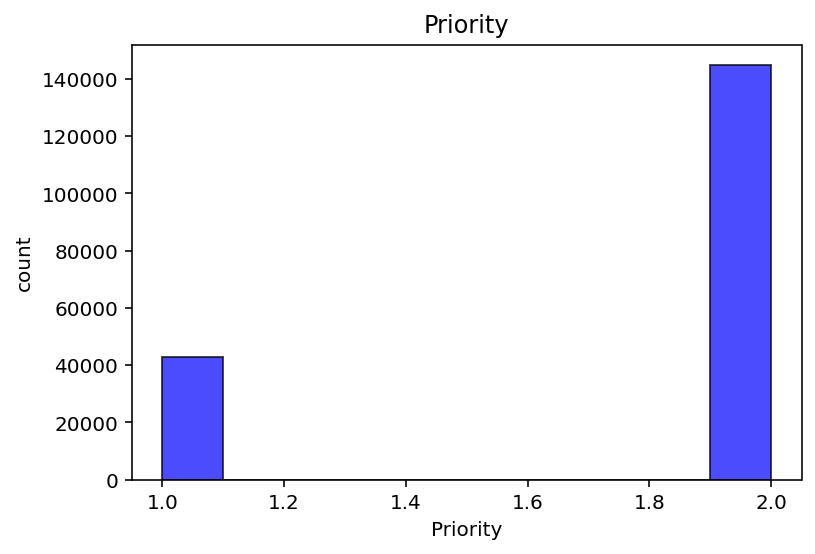

In [59]:
plt.hist(t2014.AreaId, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("areaid")
plt.ylabel("count")
plt.title("Area")
plt.show()

plt.hist(t2014.Priority, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Priority")
plt.ylabel("count")
plt.title("Priority")
plt.show()

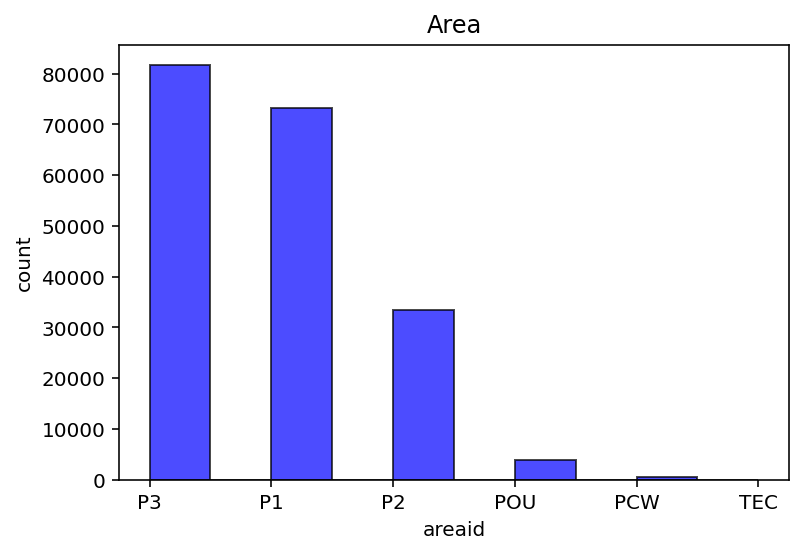

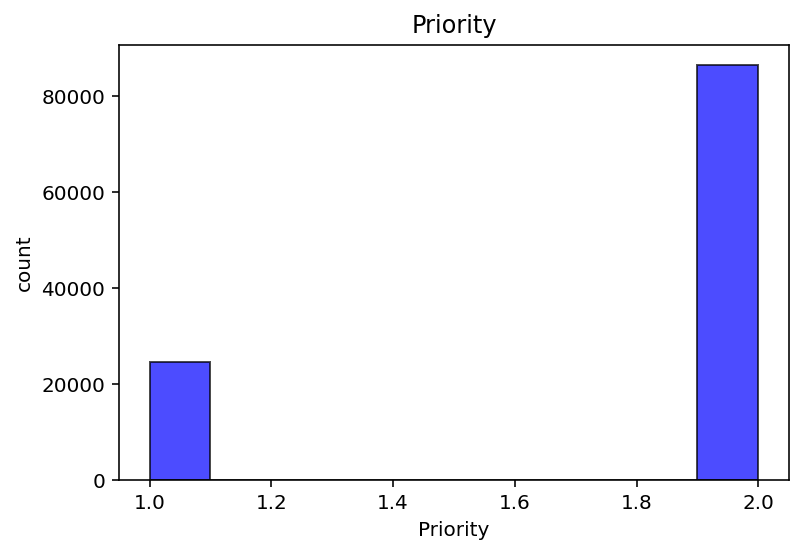

In [60]:
plt.hist(t2015.AreaId, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("areaid")
plt.ylabel("count")
plt.title("Area")
plt.show()

plt.hist(t2016.Priority, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Priority")
plt.ylabel("count")
plt.title("Priority")
plt.show()

Text(0, 0.5, 'area')

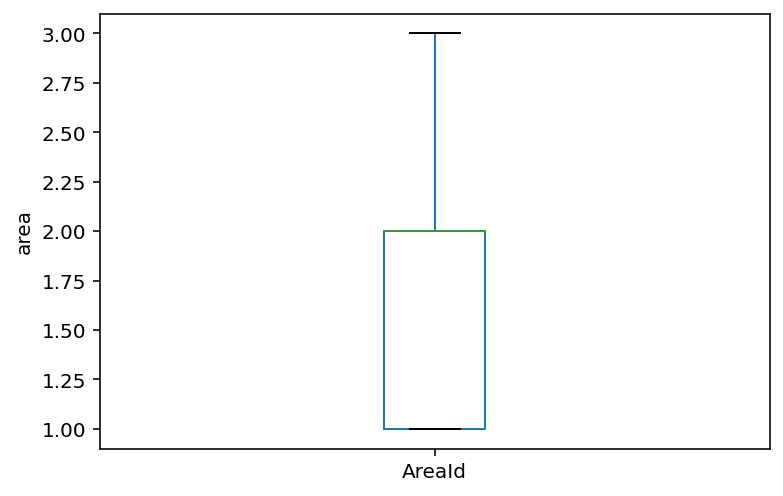

In [61]:
#区域id箱线图
fig,axes = plt.subplots()
t2011['AreaId'].plot(kind='box',ax=axes)
axes.set_ylabel('area')

Text(0, 0.5, 'area')

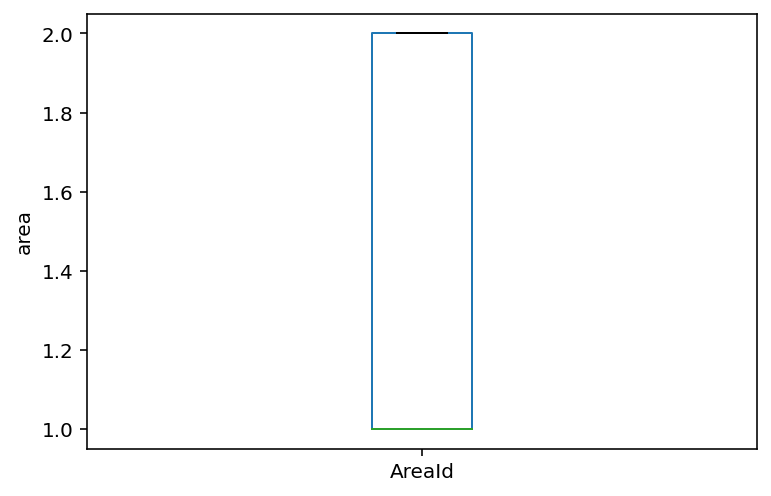

In [62]:
fig,axes = plt.subplots()
t2012['AreaId'].plot(kind='box',ax=axes)
axes.set_ylabel('area')

Text(0, 0.5, 'area')

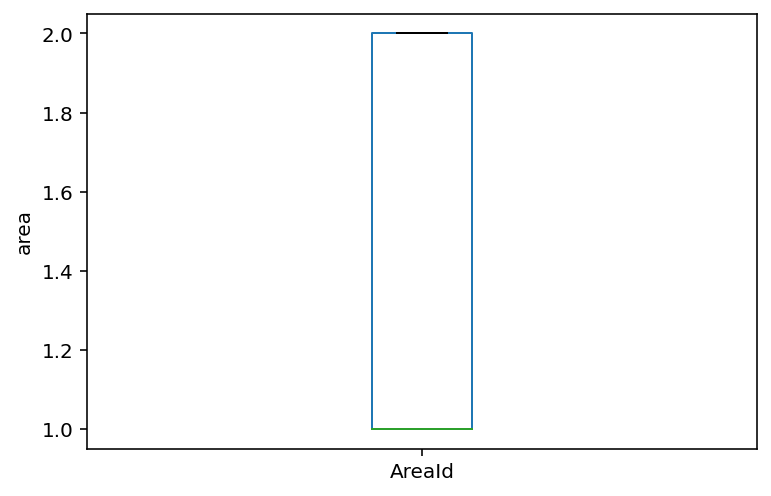

In [64]:
fig,axes = plt.subplots()
t2013['AreaId'].plot(kind='box',ax=axes)
axes.set_ylabel('area')

Text(0, 0.5, 'area')

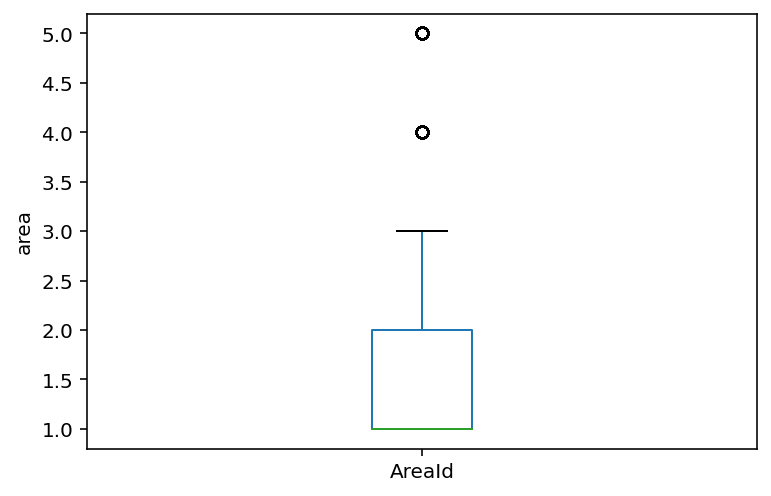

In [65]:
fig,axes = plt.subplots()
t2014['AreaId'].plot(kind='box',ax=axes)
axes.set_ylabel('area')

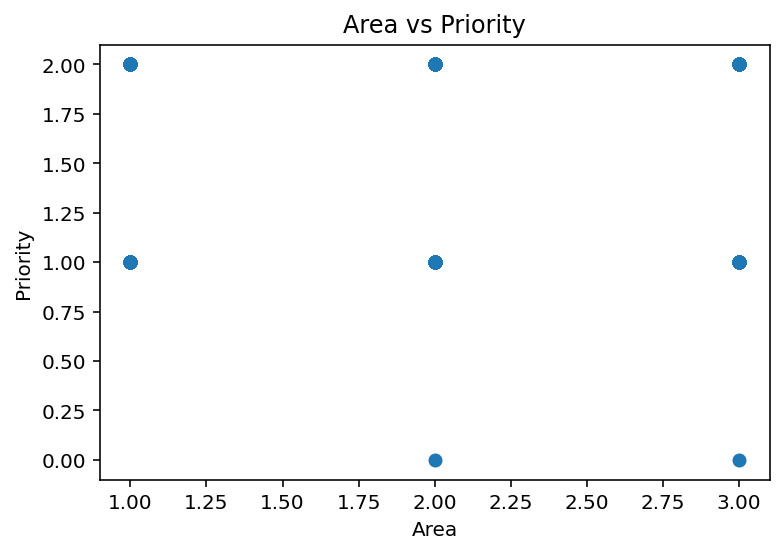

In [68]:
#区域与事件优先级散点图
plt.scatter(t2011.AreaId,t2011.Priority)

plt.title('Area vs Priority')

plt.xlabel('Area')

plt.ylabel('Priority')

plt.show()

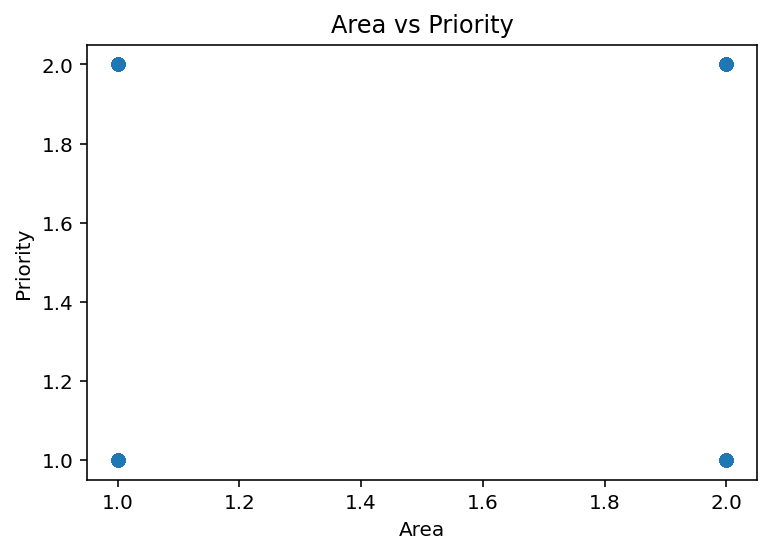

In [69]:
plt.scatter(t2012.AreaId,t2012.Priority)

plt.title('Area vs Priority')

plt.xlabel('Area')

plt.ylabel('Priority')

plt.show()

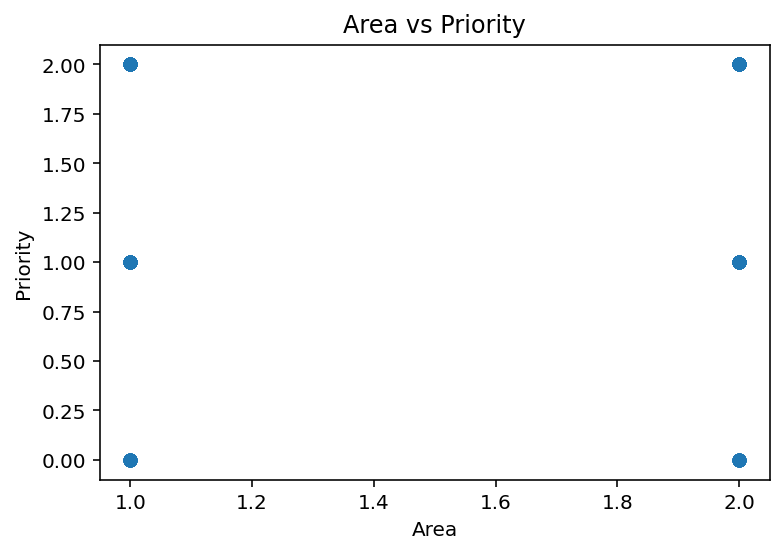

In [70]:
plt.scatter(t2013.AreaId,t2013.Priority)

plt.title('Area vs Priority')

plt.xlabel('Area')

plt.ylabel('Priority')

plt.show()

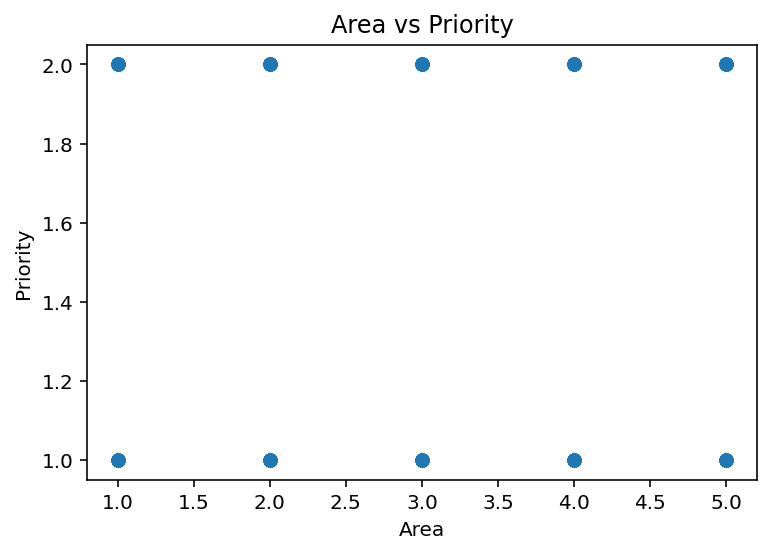

In [71]:
plt.scatter(t2014.AreaId,t2014.Priority)

plt.title('Area vs Priority')

plt.xlabel('Area')

plt.ylabel('Priority')

plt.show()

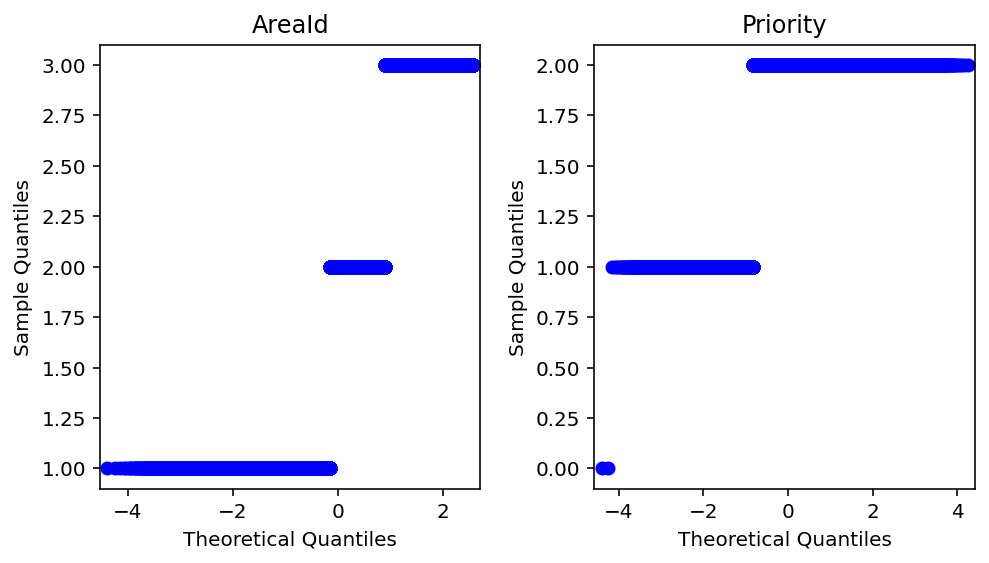

In [72]:
#qq图
fig =plt.figure(figsize=(30,20))
i=1
for item in ["AreaId","Priority"]:
    ax=fig.add_subplot(4,7,i)
    sm.qqplot(t2011[item],ax=ax)
    ax.set_title(item)
    i+=1
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

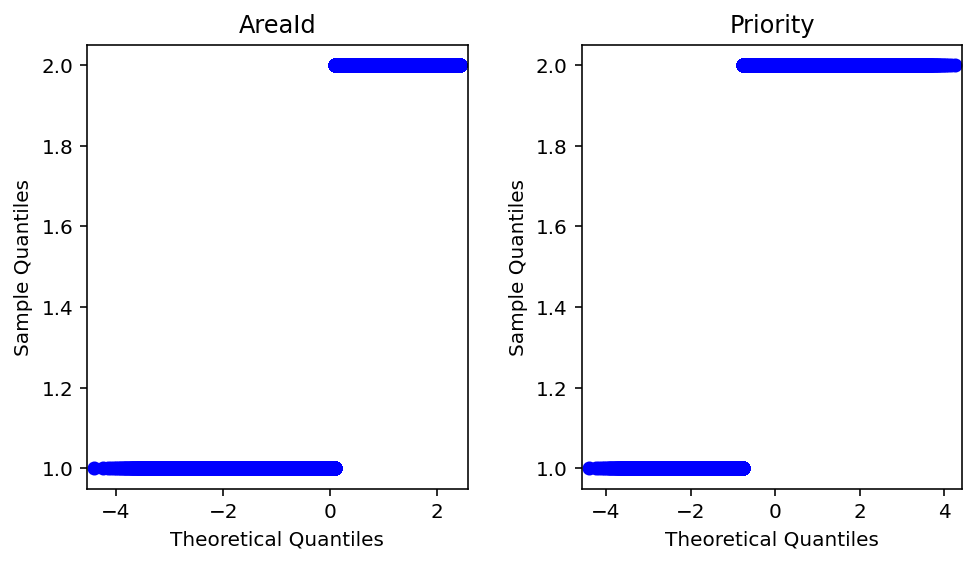

In [73]:
fig =plt.figure(figsize=(30,20))
i=1
for item in ["AreaId","Priority"]:
    ax=fig.add_subplot(4,7,i)
    sm.qqplot(t2012[item],ax=ax)
    ax.set_title(item)
    i+=1
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

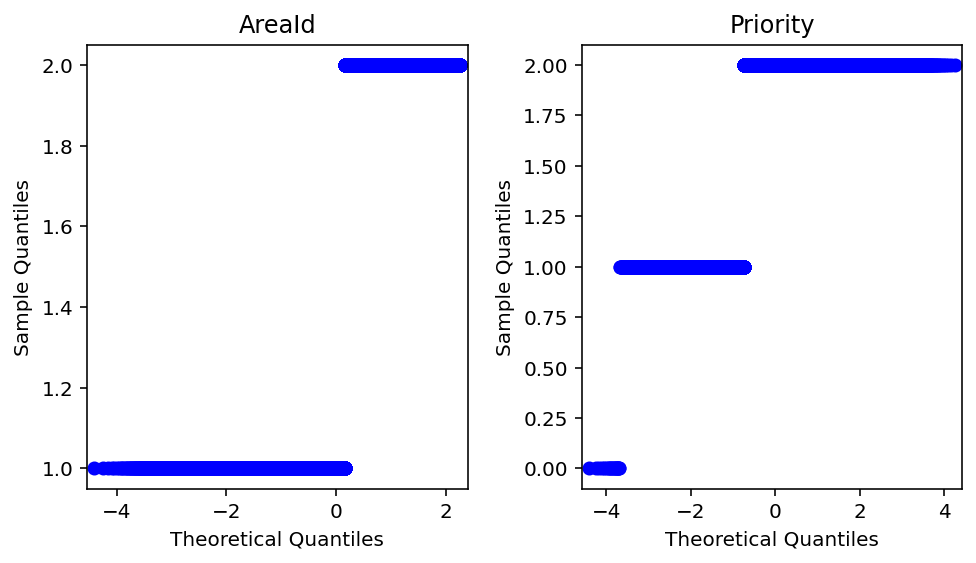

In [75]:
fig =plt.figure(figsize=(30,20))
i=1
for item in ["AreaId","Priority"]:
    ax=fig.add_subplot(4,7,i)
    sm.qqplot(t2013[item],ax=ax)
    ax.set_title(item)
    i+=1
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

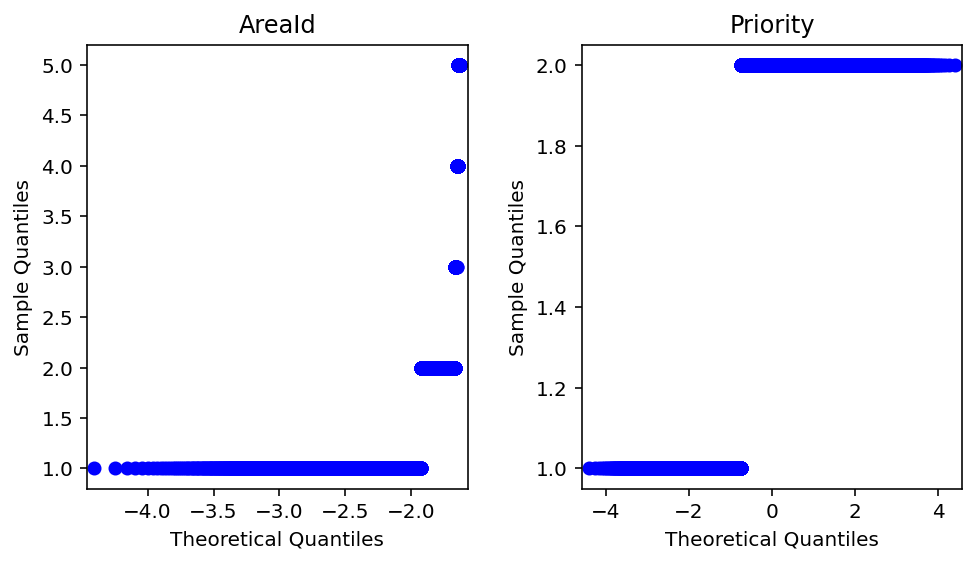

In [77]:
fig =plt.figure(figsize=(30,20))
i=1
for item in ["AreaId","Priority"]:
    ax=fig.add_subplot(4,7,i)
    sm.qqplot(t2014[item],ax=ax)
    ax.set_title(item)
    i+=1
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()